## Credit Card Default Data

In [648]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [649]:
df = pd.read_excel('Default.xlsx')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [650]:
print("The shape of the dataset is : " + str(df.shape))

for col in df.columns: 
    print(f"Number of missing values for {col} is : {df[col].isnull().sum()}")

The shape of the dataset is : (10000, 4)
Number of missing values for default is : 0
Number of missing values for student is : 0
Number of missing values for balance is : 0
Number of missing values for income is : 0


In [651]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


## Data Exploration

In [652]:
print(df.default.unique())
print(df.student.unique())
print(df.balance.min() , df.balance.max())
print(df.income.min() , df.income.max())

['No' 'Yes']
['No' 'Yes']
0.0 2654.3225762802
771.96772938636 73554.233495197


In [653]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['student'] = le.fit_transform(df['student'])
df['default'] = le.fit_transform(df['default'])    

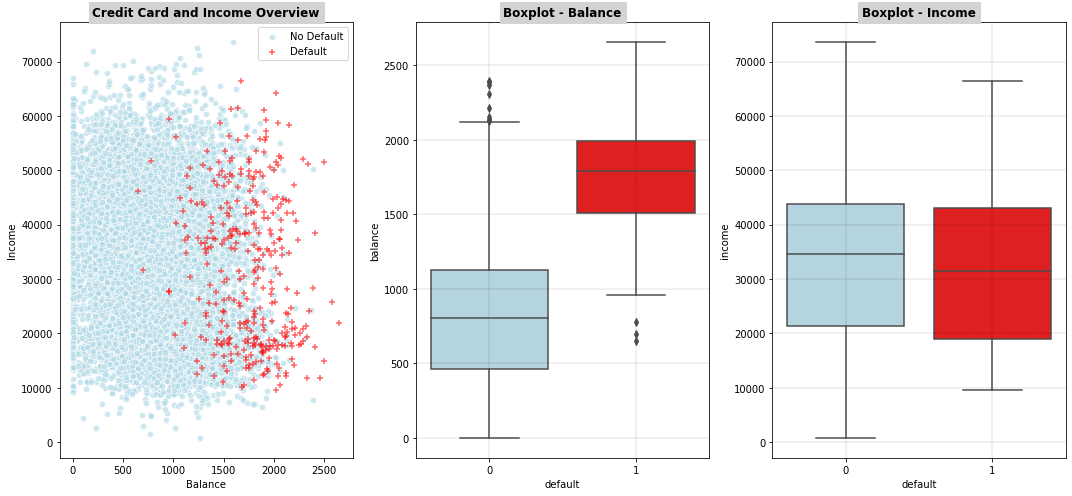

In [654]:
plt.figure(figsize=(15,7), edgecolor='black')

c_palette = {1:'red', 0:'lightblue'}

plt.subplot(1,3,1)
plt.scatter(df[df['default'] == 0].balance, df[df['default']==0].income, marker='o', color='lightblue', 
            edgecolor='white', s=40, alpha=0.6, label='No Default')
plt.scatter(df[df['default']==1].balance, df[df['default']==1].income, marker='+', color='red',
           edgecolor='black', s=40, alpha=0.6, label='Default')
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.title('Credit Card and Income Overview', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')
plt.legend()

plt.subplot(1,3,2)
sns.boxplot(x="default", y="balance", data=df, palette=c_palette, orient='v')
plt.grid(lw=0.3, linestyle='dotted', color='black')
plt.title('Boxplot - Balance', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.subplot(1,3,3)
sns.boxplot(x="default", y="income", data=df, palette=c_palette, orient='v')
plt.grid(lw=0.3, linestyle='dotted', color='black')
plt.title('Boxplot - Income', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.tight_layout()
plt.show()

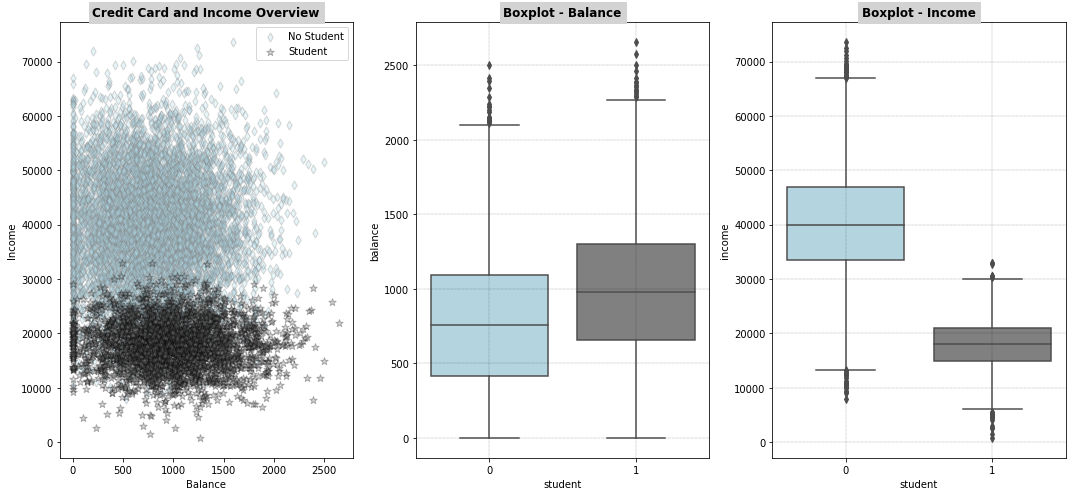

In [655]:
plt.figure(figsize=(15,7), edgecolor='black')

plt.subplot(1,3,1)

plt.scatter(df[df['student']==0].balance, df[df['student']==0].income, marker='d', color='lightblue',
           edgecolor='gray', label='No Student', s=40, alpha=.3)
plt.scatter(df[df['student']==1].balance,df[df['student']==1].income, marker='*', color='gray',
           edgecolor='black', label='Student', s=60, alpha=.3)
plt.xlabel('Balance', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.title('Credit Card and Income Overview', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')
plt.legend()


plt.subplot(1,3,2)
c_palette={0:'lightblue', 1:'gray'}
sns.boxplot(x="student", y='balance', data=df, palette=c_palette)
plt.grid(lw=0.3, linestyle='dotted', color='black')
plt.title('Boxplot - Balance', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.subplot(1,3,3)
c_palette={0:'lightblue', 1:'gray'}
sns.boxplot(x="student", y='income', data=df, palette=c_palette)
plt.grid(lw=0.3, linestyle='dotted', color='black')
plt.title('Boxplot - Income', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.tight_layout()
plt.show()

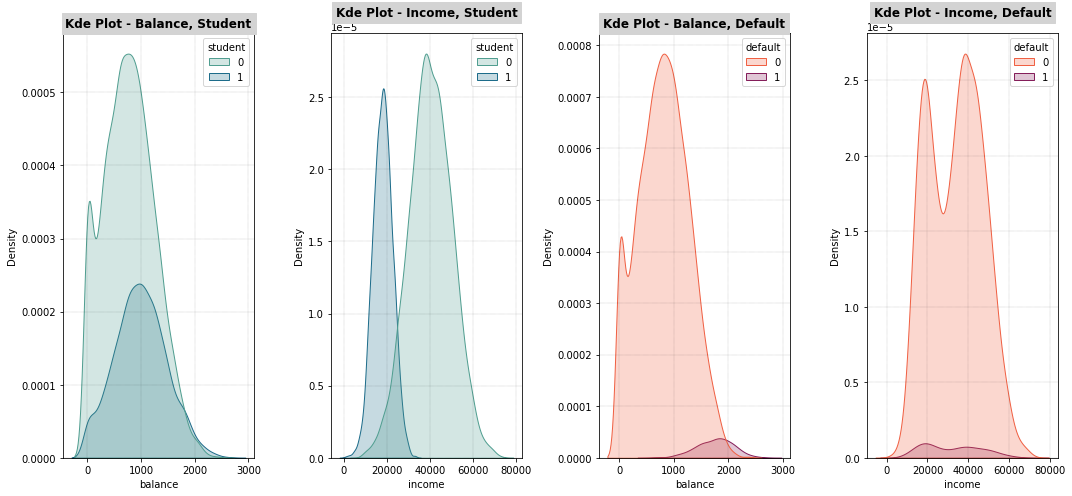

In [656]:
plt.figure(figsize=(15,7))

plt.subplot(1,4,1)
sns.kdeplot(x="balance", data=df, hue="student", shade=True, palette="crest")
plt.grid(lw=0.2, linestyle='dotted', color='black')
plt.title('Kde Plot - Balance, Student', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.subplot(1,4,2)
sns.kdeplot(x="income", data=df, hue="student", shade=True, palette="crest")
plt.grid(lw=0.2, linestyle='dotted', color='black')
plt.title('Kde Plot - Income, Student', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.subplot(1,4,3)
sns.kdeplot(x="balance", data=df, hue="default", shade=True, palette="rocket_r")
plt.grid(lw=0.2, linestyle='dotted', color='black')
plt.title('Kde Plot - Balance, Default', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.subplot(1,4,4)
sns.kdeplot(x="income", data=df, hue="default", shade=True, palette="rocket_r")
plt.grid(lw=0.2, linestyle='dotted', color='black')
plt.title('Kde Plot - Income, Default', fontsize=12, fontweight='bold', backgroundcolor= 'lightgray')

plt.tight_layout()
plt.show()

In [657]:
df.describe(include='all')

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


## KMeans Clustering

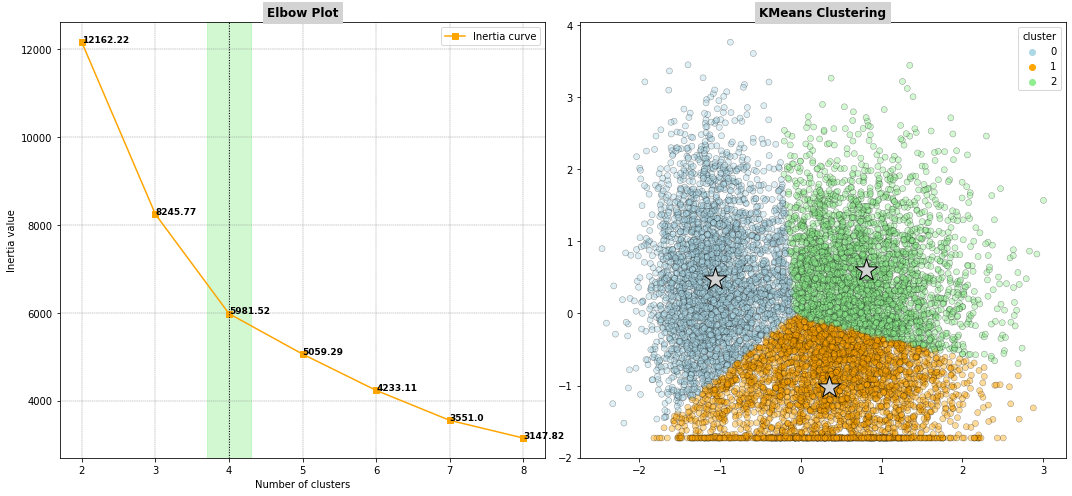

In [658]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_kmeans = pd.DataFrame({'income':df.income, 'balance':df.balance})
df_scaled = StandardScaler().fit_transform(df_kmeans)

inertia = []

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
for i in np.arange(2,9):
    
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_scaled)
    model.predict(df_scaled)
    model.labels_
    inertia.append(model.inertia_)

plt.plot(np.arange(2,9), inertia, marker ='s', color='orange', label='Inertia curve')
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Inertia value', fontsize=10)
plt.title('Elbow Plot', fontweight='bold', fontsize=12, backgroundcolor='lightgray')
plt.grid(lw=0.4, linestyle='dashed', color='gray')

for label, x, y in zip(np.around(inertia,2), np.arange(2,9), inertia):
    plt.annotate(label, xy=(x,y), fontsize=9, fontweight='bold')
    
plt.axvspan(3.7,4.3, color='lightgreen', alpha=.4)
plt.axvline(x=4, color='black', linestyle='dotted', lw=1)
    
plt.legend()
plt.tight_layout()


#Kmeans for k=3:
model = KMeans(n_clusters=3, random_state=0)
model.fit(df_scaled)
model.predict(df_scaled)
model.labels_

centroids = model.cluster_centers_
df_kmeans['cluster'] = model.labels_

plt.subplot(1,2,2)
c_palette = {0:'lightblue', 1:'orange', 2:'lightgreen'}
sns.scatterplot(df_scaled[:,0], df_scaled[:,1], hue=df_kmeans.cluster, edgecolor='black', alpha=.4, 
                palette=c_palette, markers=markers)
plt.title('KMeans Clustering', fontsize=12, fontweight='bold', backgroundcolor='lightgray')
plt.scatter(centroids[:,0], centroids[:,1], marker='*', color='lightgrey', s=550, edgecolor='black')
plt.show()

## Logistic Regression

In [659]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

X = df.balance.values.reshape(-1,1)
y = df.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimension of X_train is :" + str(X_train.shape))
print("Dimension of X_test is :" + str(X_test.shape))
print("Dimension of y_train is :" + str(y_train.shape))
print("Dimension of y_test is :" + str(y_test.shape))

Dimension of X_train is :(8000, 1)
Dimension of X_test is :(2000, 1)
Dimension of y_train is :(8000,)
Dimension of y_test is :(2000,)


In [660]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [661]:
y_pred = lr.predict(X_test)
print(np.around(lr.predict_proba(X_test),5))

[[9.4314e-01 5.6860e-02]
 [9.9858e-01 1.4200e-03]
 [9.9998e-01 2.0000e-05]
 ...
 [9.9998e-01 2.0000e-05]
 [9.6437e-01 3.5630e-02]
 [9.9990e-01 1.0000e-04]]


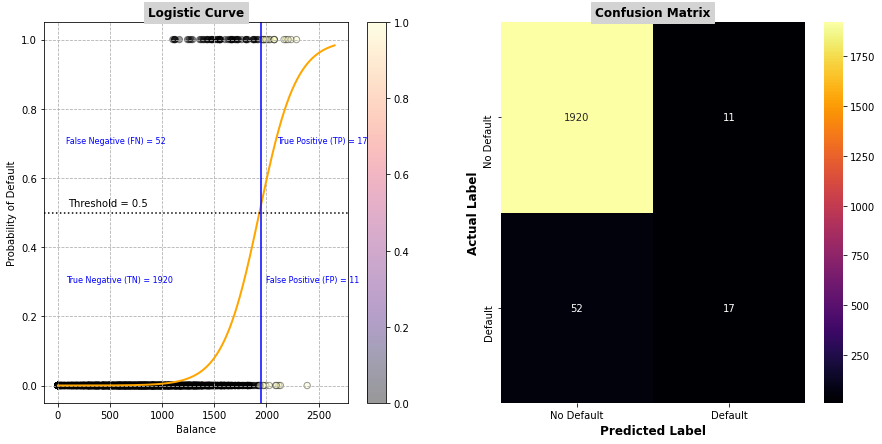

In [662]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
c_palette = {0:'lightblue', 1:'yellow'}
sc=plt.scatter(X_test, y_test, c=y_pred, cmap='magma', edgecolor='black', alpha=.4, s=40)
X_test_view = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)
plt.plot(X_test_view, lr.predict_proba(X_test_view)[:,1], color='orange', lw=2)


plt.xlabel('Balance', fontsize=10)
plt.ylabel('Probability of Default', fontsize=10)
plt.colorbar(sc)
plt.title('Logistic Curve', fontsize=12, fontweight='bold', backgroundcolor='lightgray')
plt.grid(linestyle='dashed')

plt.axhline(y=0.5, linestyle='dotted', color='black')
plt.axvline(x=1950, linestyle='solid', color='blue')
plt.text(100,0.52,'Threshold = 0.5')
plt.text(80,0.3,"True Negative (TN) = 1920", fontsize=8, color='blue')
plt.text(80,0.7,"False Negative (FN) = 52 ", fontsize=8, color='blue')
plt.text(2100,0.7,"True Positive (TP) = 17", fontsize=8, color='blue')
plt.text(2000,0.3,"False Positive (FP) = 11", fontsize=8, color='blue')


ax = plt.subplot(1,2,2)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, cmap='inferno', fmt='g')
ax.xaxis.set_ticklabels(['No Default','Default'], fontsize=10)
ax.yaxis.set_ticklabels(['No Default', 'Default'], fontsize=10)

ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('Actual Label',  fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix',  fontsize=12, fontweight='bold', backgroundcolor='lightgray')

plt.show()

In [663]:
num_err = np.sum(y_test != y_pred)
num_err

63

In [664]:
print('Coefficient of the logistic regression is : \n' +str(lr.coef_))
print('Intercept of the logistic regression is : \n' + str(lr.intercept_))

Coefficient of the logistic regression is : 
[[0.00564782]]
Intercept of the logistic regression is : 
[-10.91699938]


In [684]:
print(np.around(lr.score(X_train, y_train),2))
print(np.around(lr.score(X_test, y_test),2))

0.97
0.97


In [685]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.61      0.25      0.35        69

    accuracy                           0.97      2000
   macro avg       0.79      0.62      0.67      2000
weighted avg       0.96      0.97      0.96      2000



- This parameter sums all the true positives and true negatives and divides them by the total number of instances. It provides an answer to the following question: of all the positive and negative classes, how many of them were predicted correctly ?

$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN}  $$

- Accuracy indicates the ratio of correct positive predictions to the total number of positive predictions. This parameter therefore answers the following question: of all the predicted positive records, how many are actually positive ?

$$ Précision = \frac{TP}{TP+FP}  $$

- Recall is a parameter that measures the number of correct positive predictions out of the total number of positive data. It answers the following question: of all the positive records, how many were correctly predicted ? 

$$ Recall = \frac{TP}{TP+FN}  $$

- The F1 score (or F-measure) is a harmonic mean of precision and recall.

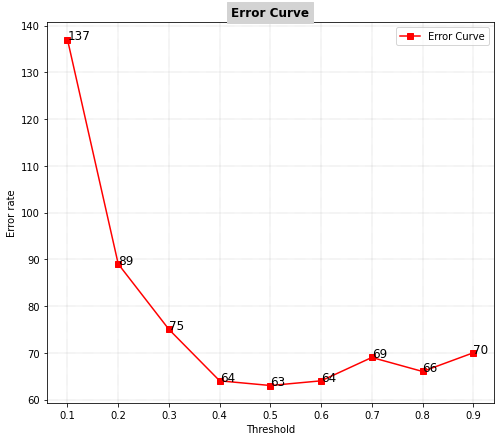

In [686]:
threshold = np.arange(0.1,1,0.1)
error_rate = []

plt.figure(figsize=(8,7))

for i in threshold:
    y_pred_new_threshold = (lr.predict_proba(X_test)[:, 1] >= i).astype(int)
    error_rate.append(np.sum(y_test != y_pred_new_threshold))

plt.plot(threshold, error_rate, color='red', marker='s', label='Error Curve')
plt.xlabel('Threshold', fontdict={'fontsize':10})
plt.ylabel('Error rate', fontdict={'fontsize':10})
plt.title('Error Curve', fontsize=12, fontweight='bold', backgroundcolor='lightgray')
plt.grid(linestyle='dotted', lw=.4, color='gray')
plt.legend()

for label, x, y in zip(error_rate, threshold, error_rate):
    plt.text(x,y, f'{label}', fontdict={'fontsize':12})

plt.show()


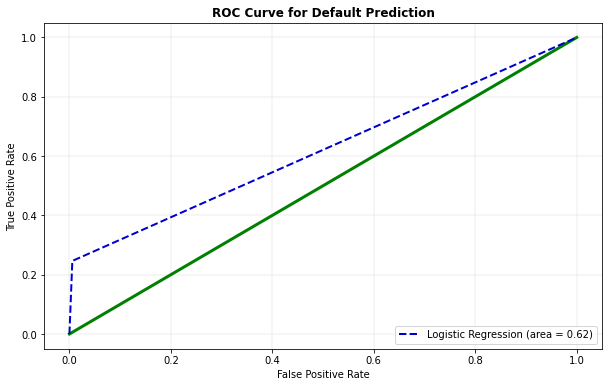

In [687]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

plt.figure(figsize=(10,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], 'k-', lw=3, color='green')

# Plot tpr against fpr
roc_auc = roc_auc_score(y_test, y_pred)

# Logistic Regression
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %roc_auc, color='mediumblue', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.grid(True, lw=0.2)
plt.title('ROC Curve for Default Prediction', fontweight='bold', fontsize=12)
plt.show()

## GridSearchCV - Logistic Regression

In [688]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import mean_squared_error

#Feature and Target
X = df[['balance','income']]
y = df.default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logisitic Regression
clf_lr = LogisticRegression(solver='liblinear') #l1:Ridge or l2=Lasso

#GridSearchCV
parameters = {'C':[0.001, 0.01, 1, 10, 100, 1000], 'penalty':['l1','l2']}
searcher = GridSearchCV(clf_lr, param_grid=parameters)
searcher.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [713]:
print("Best Parameters", str(searcher.best_params_))

Best Parameters {'C': 1, 'penalty': 'l1'}


In [714]:
# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Total number of features: 2
Number of selected features: 2


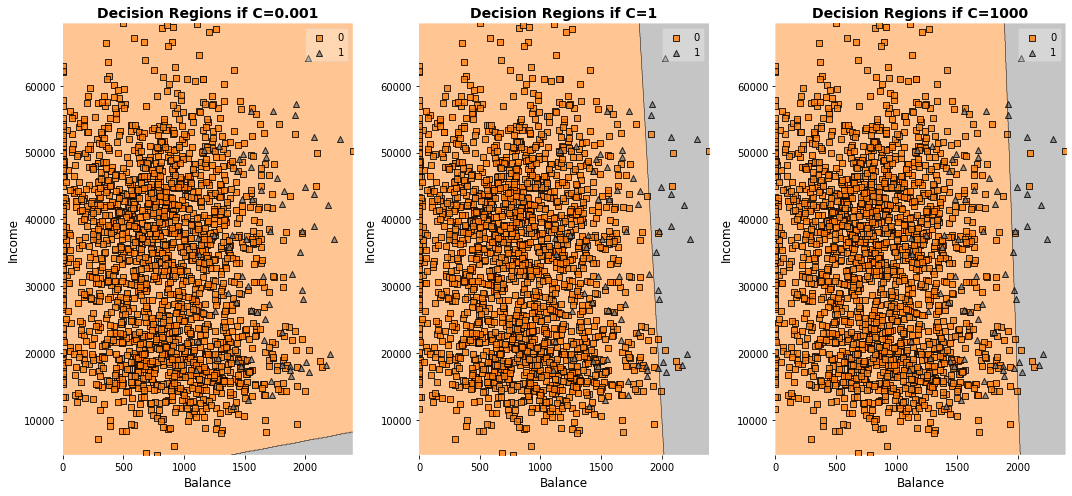

In [715]:
pos=1

plt.figure(figsize=(15,7))
for p in [0.001,1, 1000]:
    plt.subplot(1,3,pos)
    clf_lr_C = LogisticRegression(solver='liblinear', C=p, penalty='l1')
    clf_lr_C.fit(X_train, y_train)
    plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf_lr_C, colors='#ff7f0e,#7f7f7f')

    plt.xlabel('Balance', fontdict={'fontsize':12})
    plt.ylabel('Income', fontdict={'fontsize':12})
    plt.title(f'Decision Regions if C={p}', fontdict={'fontsize':14, 'fontweight':'bold'})
    plt.tight_layout()
    pos+=1 


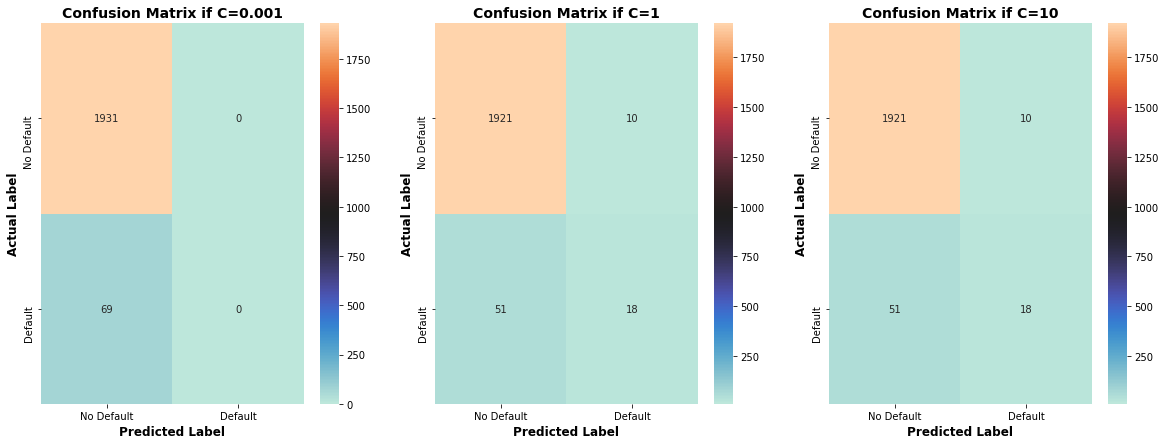

In [692]:
pos=1

plt.figure(figsize=(20,7))

for p in [0.001,1, 10]:
    ax = plt.subplot(1,3,pos)
    
    clf_lr_C = LogisticRegression(solver='liblinear', C=p, penalty='l1')
    clf_lr_C.fit(X_train, y_train)
    
    cf_matrix = confusion_matrix(y_test, clf_lr_C.predict(X_test))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='icefire')
    ax.xaxis.set_ticklabels(['No Default', 'Default'])
    ax.yaxis.set_ticklabels(['No Default','Default'], fontsize=10)
    ax.set_title(f'Confusion Matrix if C={p}', fontdict={'fontsize':14, 'fontweight':'bold'})
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('Actual Label', fontsize=12, fontweight='bold')
    
    pos+=1

In [693]:
print(np.around(clf_lr_C.score(X_train, y_train),2))
print(np.around(clf_lr_C.score(X_test, y_test),2))

0.97
0.97


In [696]:
confusion_matrix(y_test, clf_lr_C.predict(X_test))
print(classification_report(y_test, clf_lr_C.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.64      0.26      0.37        69

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [711]:
Xnew = [[1000, 65000]]
clf_lr_C.predict(Xnew)

array([0])

## Support Vector Machine (SVM)

In [741]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid=parameters)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 1e-05}


In [760]:
svc = SVC(gamma=1e-05)
svc.fit(X_train, y_train)

SVC(gamma=1e-05)

In [761]:
y_pred = svc.predict(X_test)

<Axes: >

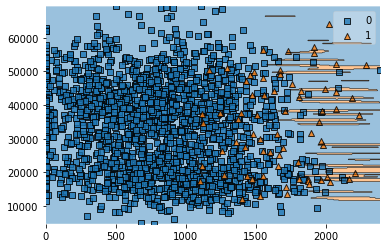

In [762]:
plot_decision_regions(X_test.to_numpy(), y_test.to_numpy(), clf=svc)

In [763]:
confusion_matrix(y_test, y_pred)

array([[1924,    7],
       [  62,    7]])

In [764]:
svc.score(X_train, y_train)

0.97725

In [765]:
svc.score(X_test, y_test)

0.9655